# DSV Week 4: Discrete Fourier Transform
Sander Hansen
10995080

In [4]:
from sympy.plotting import plot
from sympy.abc import symbols
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile
import resampy
import csv

## Assignment 1

In [5]:
def make_tone(frequency=1000, sample_rate=44100, duration=2):
    interval = np.linspace(0, duration, sample_rate * duration)
    return np.sin(2 * np.pi * frequency * interval)

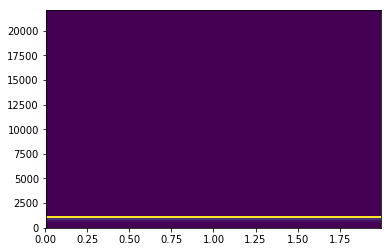

In [6]:
frequency = 1000
sample_rate = 44100
duration = 2

tone = make_tone(frequency, sample_rate, duration)

f, t, Sxx = signal.spectrogram(tone, sample_rate)
plt.pcolormesh(t, f, Sxx)
plt.show()

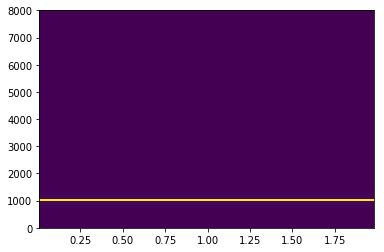

In [7]:
resample_rate = 16000
tone_res = resampy.resample(tone, sample_rate, resample_rate)

f, t, Sxx = signal.spectrogram(tone_res, resample_rate)
plt.pcolormesh(t, f, Sxx)
plt.show()

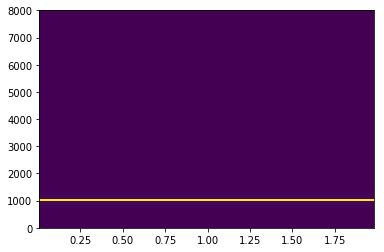

In [8]:
tone_res2 = signal.resample(tone, resample_rate * duration)

f, t, Sxx = signal.spectrogram(tone_res2, resample_rate)
plt.pcolormesh(t, f, Sxx)
plt.show()

In [12]:
rate, music = wavfile.read('muziek_48kHz.wav')

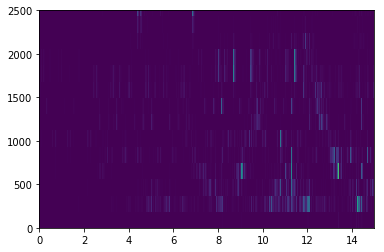

In [13]:
f, t, Sxx = signal.spectrogram(music[:,1], rate)
plt.pcolormesh(t, f, Sxx)
plt.ylim(0, 2500)
plt.show()

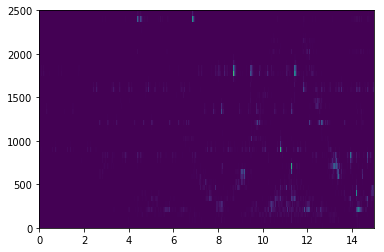

In [14]:
music_res = resampy.resample(music[:,1], rate, resample_rate)

f, t, Sxx = signal.spectrogram(music_res, resample_rate)
plt.pcolormesh(t, f, Sxx)
plt.ylim(0,2500)
plt.show()

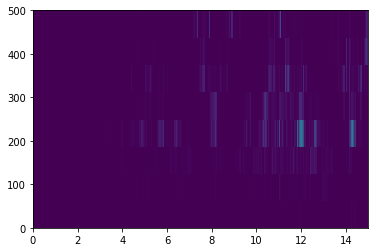

In [15]:
music_res2 = signal.resample(music[:,1], resample_rate * 15)

f, t, Sxx = signal.spectrogram(music_res2, resample_rate)
plt.pcolormesh(t, f, Sxx)
plt.ylim(0,500)
plt.show()

## Assignment 2

## Assignment 3

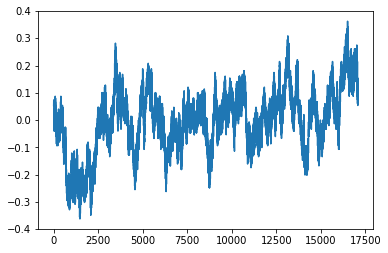

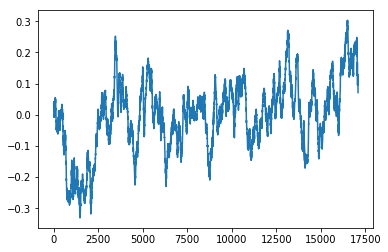

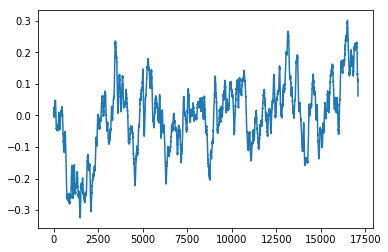

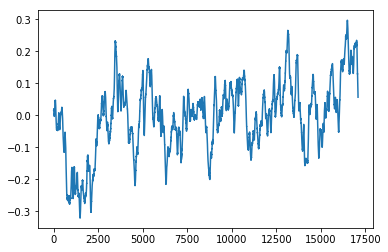

In [16]:
def read_csv(file_name):
    with open(file_name, 'r') as file:
        csv_file = csv.reader(file, delimiter='\t')
        x = [float(s) for s in np.array([rule for rule in csv_file]).flatten()]
        return np.array(x)
    
x = read_csv('eeg.csv')

plt.plot(x)
plt.show()

impulse_response = np.ones(10)
y = np.convolve(x, impulse_response, mode='same')/10
plt.plot(y)
plt.show()

impulse_response = np.ones(20)
y = np.convolve(x, impulse_response, mode='same')/20
plt.plot(y)
plt.show()

impulse_response = np.ones(30)
y = np.convolve(x, impulse_response, mode='same')/30
plt.plot(y)
plt.show()

## Assignment 4

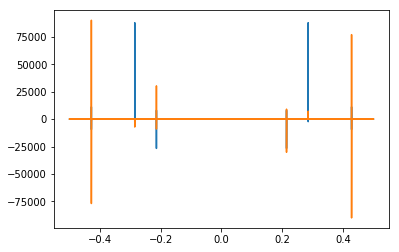

In [17]:
def signal_4(t):
    return 3 * np.cos(2*np.pi*30*t) + 2 * np.cos(2*np.pi*20*t) + np.sin(np.pi*30*t)

t = np.linspace(0, 2, 2 * 44100)
y = signal_4(t * 100 * 2 * np.pi)

fourier = np.fft.fft(y)
x = np.fft.fftfreq(2 * 44100)
plt.plot(x, fourier.real, x , fourier.imag)
plt.show()

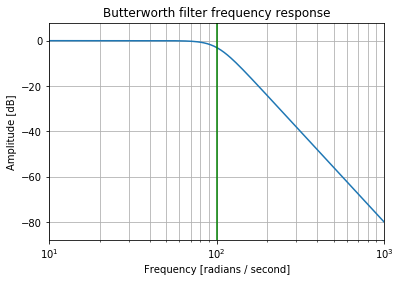

In [18]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()